#Introduction to Overfitting and Underfitting

##Overfitting
**Overfitting is primarily caused by:**
* High Model Complexity: When the model is excessively complex, it can fit the
noise in the training data.
* Noisy Data: Data with inconsistencies or outliers can mislead the model during training.

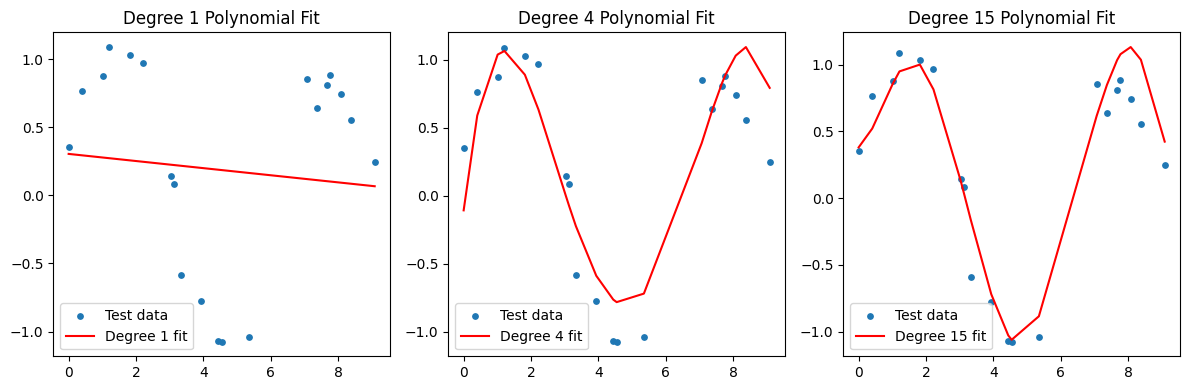

In [ ]:
#Let's demonstrate overfitting using a polynomial regression model on a synthetic dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generating synthetic dataset
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.2, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit polynomial regression models of different degrees
degrees = [1, 4, 15]
plt.figure(figsize=(12, 4))

for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    degree = degrees[i]
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = polynomial_features.transform(X_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y_train)
    y_poly_pred = model.predict(X_poly_test)

    plt.scatter(X_test, y_test, s=15, label='Test data')
    plt.plot(np.sort(X_test), y_poly_pred[np.argsort(X_test)], label=f'Degree {degree} fit', color='r')
    plt.legend()
    plt.title(f'Degree {degree} Polynomial Fit')

plt.tight_layout()
plt.show()

#Notice: how higher-degree polynomial fits tend to overfit the noise in the data.

##Underfitting
Underfitting is mainly caused by:
* Insufficient Model Complexity: When the model is too simple to capture the underlying patterns in the data.

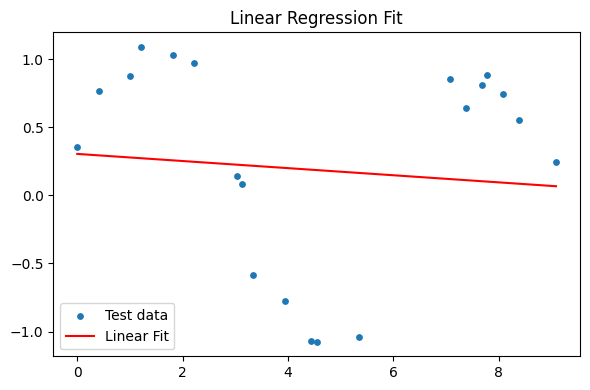

In [ ]:
#We'll use a linear regression model to demonstrate underfitting on the same synthetic dataset:
plt.figure(figsize=(6, 4))

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
y_linear_pred = model.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_test, s=15, label='Test data')
plt.plot(np.sort(X_test), y_linear_pred[np.argsort(X_test)], label='Linear Fit', color='r')
plt.legend()
plt.title('Linear Regression Fit')

plt.tight_layout()
plt.show()

#Note: Here, the linear regression model shows signs of underfitting as it fails to capture the sinusoidal pattern present in the data.

##Bias-Variance Tradeoff
* Bias: Error from erroneous assumptions in the learning algorithm. High bias can cause underfitting.
* Variance: Error due to too much complexity in the model. High variance can cause overfitting.


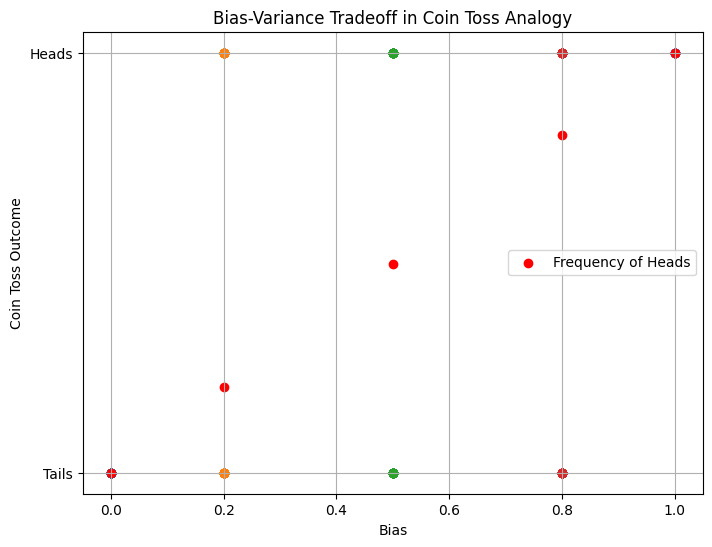

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def toss_coin(bias=0):
    if np.random.rand() < bias:
        return 'Heads'
    else:
        return 'Tails'

# Simulate coin tosses with varying bias
num_tosses = 1000
biases = [0, 0.2, 0.5, 0.8, 1]  # Varying degrees of bias

results = {bias: [toss_coin(bias) for _ in range(num_tosses)] for bias in biases}

# Calculate frequencies of 'Heads' for different biases
head_freqs = {bias: results[bias].count('Heads') / num_tosses for bias in biases}

# Plotting results
plt.figure(figsize=(8, 6))

for bias in biases:
    plt.scatter([bias] * num_tosses, results[bias], alpha=0.1)

plt.scatter(biases, [head_freqs[bias] for bias in biases], color='red', marker='o', label='Frequency of Heads')
plt.xlabel('Bias')
plt.ylabel('Coin Toss Outcome')
plt.title('Bias-Variance Tradeoff in Coin Toss Analogy')
plt.legend()
plt.grid(True)
plt.show()


##Methods to Address Overfitting and Underfitting
* Regularization techniques like L1 and L2 regularization help control model complexity by adding penalty terms to the loss function, discouraging overfitting.
* Cross-validation techniques like k-fold cross-validation or leave-one-out cross-validation assist in estimating the model's performance on unseen data.
* Feature selection and dimensionality reduction aid in reducing overfitting by selecting only relevant features or reducing the number of input dimensions.


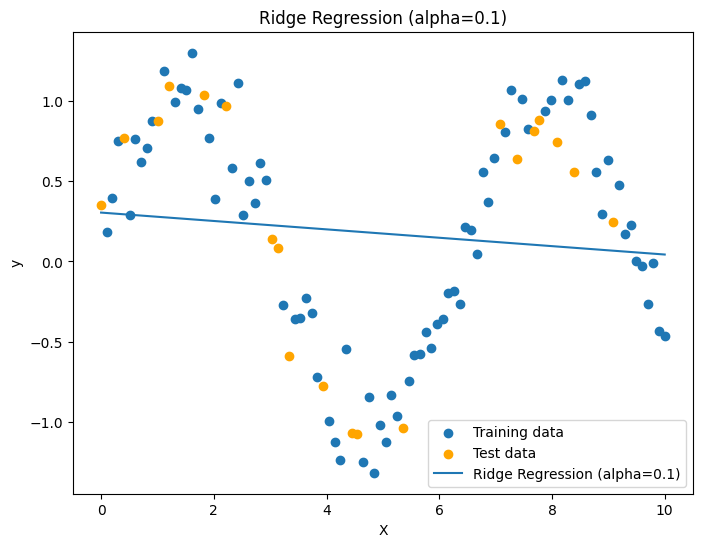

Train MSE: 0.5058, Test MSE: 0.5602


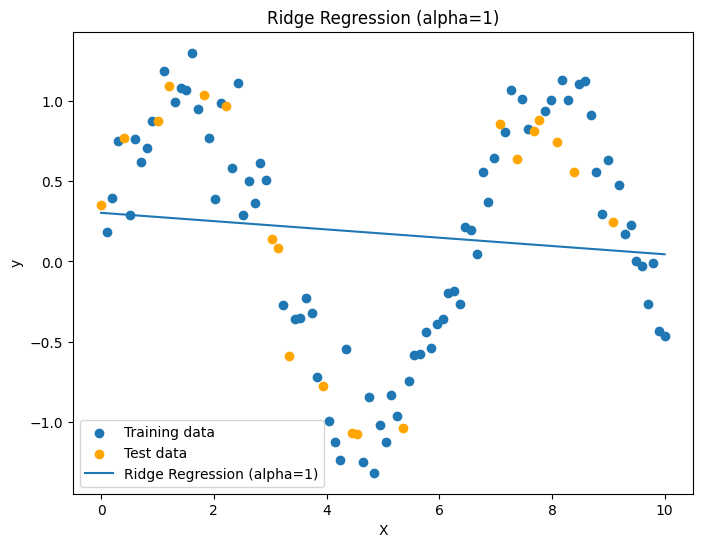

Train MSE: 0.5058, Test MSE: 0.5602


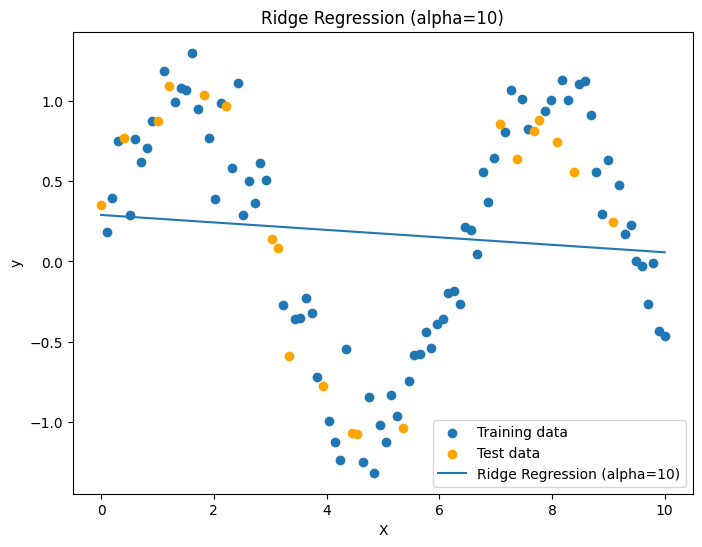

Train MSE: 0.5059, Test MSE: 0.5597


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Perform Ridge Regression with varying alpha values (regularization strength)
alphas = [0.1, 1, 10]

for alpha in alphas:
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train[:, np.newaxis])
    X_scaled_test = scaler.transform(X_test[:, np.newaxis])

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_scaled_train, y_train)

    # Plotting the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Training data')
    plt.scatter(X_test, y_test, label='Test data', color='orange')

    X_plot = np.linspace(0, 10, 100)
    X_plot_scaled = scaler.transform(X_plot[:, np.newaxis])
    plt.plot(X_plot, ridge_model.predict(X_plot_scaled), label=f'Ridge Regression (alpha={alpha})')

    plt.legend()
    plt.title(f'Ridge Regression (alpha={alpha})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

    # Calculate train and test error
    train_error = mean_squared_error(y_train, ridge_model.predict(X_scaled_train))
    test_error = mean_squared_error(y_test, ridge_model.predict(X_scaled_test))
    print(f"Train MSE: {train_error:.4f}, Test MSE: {test_error:.4f}")


## Model Evaluation in Overfitting and Underfitting
* Model evaluation metrics like accuracy, precision, recall, and F1-score help assess a model's performance concerning overfitting and underfitting.
*  Understanding how overfitting and underfitting affect these metrics aids in identifying model performance issues.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.2, 100)

# Create train and test sets
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# Function to fit polynomial regression models of varying degrees
def fit_polynomial(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train[:, np.newaxis])
    X_poly_test = poly_features.transform(X_test[:, np.newaxis])

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Calculate train and test error
    train_error = mean_squared_error(y_train, model.predict(X_poly_train))
    test_error = mean_squared_error(y_test, model.predict(X_poly_test))

    return train_error, test_error

# Fit polynomial regression models of varying degrees and calculate errors
degrees = [1, 4, 15]
for degree in degrees:
    train_error, test_error = fit_polynomial(degree)
    print(f"Degree={degree}: Train MSE: {train_error:.4f}, Test MSE: {test_error:.4f}")


Degree=1: Train MSE: 0.5403, Test MSE: 0.6547
Degree=4: Train MSE: 0.0550, Test MSE: 0.4090
Degree=15: Train MSE: 0.0318, Test MSE: 3366384.6060


In [ ]:

# Calculating train and test error for polynomial regression models
fit_polynomial(degree=1)  # Underfitting (degree=1)
fit_polynomial(degree=4)  # Balanced fit (degree=4)
fit_polynomial(degree=15)  # Overfitting (degree=15)


(0.031765008425597555, 3366384.605990651)

##Strategies for Mitigating Overfitting and Underfitting
* Early stopping during model training prevents overfitting by stopping the training process once the model's performance on the validation set starts degrading.
* Ensemble methods like bagging and boosting combine multiple models to improve performance and reduce overfitting.
* Hyperparameter tuning aims to find the optimal model complexity by adjusting parameters such as learning rate, tree depth, etc.
* Utilizing more data or data augmentation can also help combat overfitting.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.6024 - accuracy: 0.6675 - val_loss: 0.5723 - val_accuracy: 0.7350
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8250 - val_loss: 0.4833 - val_accuracy: 0.8050
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.8550 - val_loss: 0.4226 - val_accuracy: 0.8350
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8788 - val_loss: 0.3908 - val_accuracy: 0.8550
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3066 - accuracy: 0.8875 - val_loss: 0.3754 - val_accuracy: 0.8650
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.8888 - val_loss: 0.3686 - val_accuracy: 0.8600
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2794 - accuracy: 0.8938 - val_loss: 0.3625 - val_accuracy: 0.8550
Epoch 8/100
